<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/CSC645/blob/master/6zMixedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
!git clone https://github.com/emanhamed/Houses-dataset


Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2166
Receiving objects: 100% (2166/2166), 176.26 MiB | 39.68 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [4]:
import pandas as pd
df=pd.read_csv("Houses-dataset/Houses Dataset/HousesInfo.txt",header=None,delim_whitespace=True,
               names=["bedrooms","bathrooms","size","zipcode","price"])

In [5]:
df[0:10]

,bedrooms,bathrooms,size,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
5,4,5.0,4581,85266,1249000
6,3,4.0,2544,85262,799000
7,4,5.0,5524,85266,1698000
8,3,4.0,4229,85255,1749000
9,4,5.0,3550,85262,1500000


count the number of houses per zipcode

In [6]:
zipcodes=df['zipcode'].value_counts().keys().tolist()
counts=df['zipcode'].value_counts().tolist()

remove all the entries with zipcodes containing less than 20 houses

In [7]:
for count,zipcode in zip(counts,zipcodes):
  if count<20:
    idx=df[df['zipcode']==zipcode].index
    df.drop(idx,inplace=True)

In [8]:
df[0:10]

,bedrooms,bathrooms,size,zipcode,price
30,5,3.0,2520,93446,789000
32,3,2.0,1802,93446,365000
39,3,3.0,2146,93446,455000
80,4,2.5,2464,91901,599000
81,2,2.0,1845,91901,529800
82,2,1.0,1184,91901,397500
83,4,2.5,3060,91901,699999
84,3,2.5,2733,91901,689000
85,3,2.0,1706,91901,529000
86,5,4.5,4886,91901,1430000


In [10]:
import cv2

image_list=[]
prefix="Houses-dataset/Houses Dataset/"
suffix="_frontal.jpg"
for idx in df.index.tolist():
  path=prefix+str(idx)+suffix
  img=cv2.imread(path)
  img=cv2.resize(img,(48,48))
  image_list.append(img)

In [11]:

import numpy as np
images=np.stack(image_list)

In [13]:
images.shape

(384, 48, 48, 3)

In [14]:
images=images/255.

In [16]:
values=df.values
prices=values[:,4]
features=values[:,0:4]

In [17]:
print(images.shape,values.shape)

(384, 48, 48, 3) (384, 5)


In [53]:
train_images=images[0:300]
test_images=images[300:384]
train_features=features[0:300]
test_features=features[300:384]
train_prices=prices[0:300]/100000.
test_prices=prices[300:384]/100000.

In [54]:
from tensorflow.keras.layers import Dense,Input,concatenate,Flatten
from tensorflow.keras.models import Model


In [99]:
features_input=Input(shape=(4,),name="features_input")
features_layers=Dense(64,activation="relu")(features_input)
features_layers=Dense(32,activation="relu")(features_layers)
features_layers=Dense(16,activation="relu")(features_layers)

features_output=Dense(1,activation="linear")(features_layers)
image_input=Input(shape=(48,48,3),name="image_input")
flatten=Flatten()(image_input)
image_layers=Dense(64,activation="relu")(flatten)
image_output=Dense(1,activation="linear")(image_layers)

#features_model=Model(inputs=features_input,outputs=features_output)
#image_model=Model(inputs=image_input,outputs=image_output)

In [100]:
both=concatenate([image_output,features_output])

In [101]:
both=Dense(10,activation='relu')(both)
both=Dense(1,activation='linear')(both)
model=Model(inputs=[features_input,image_input],outputs=both)

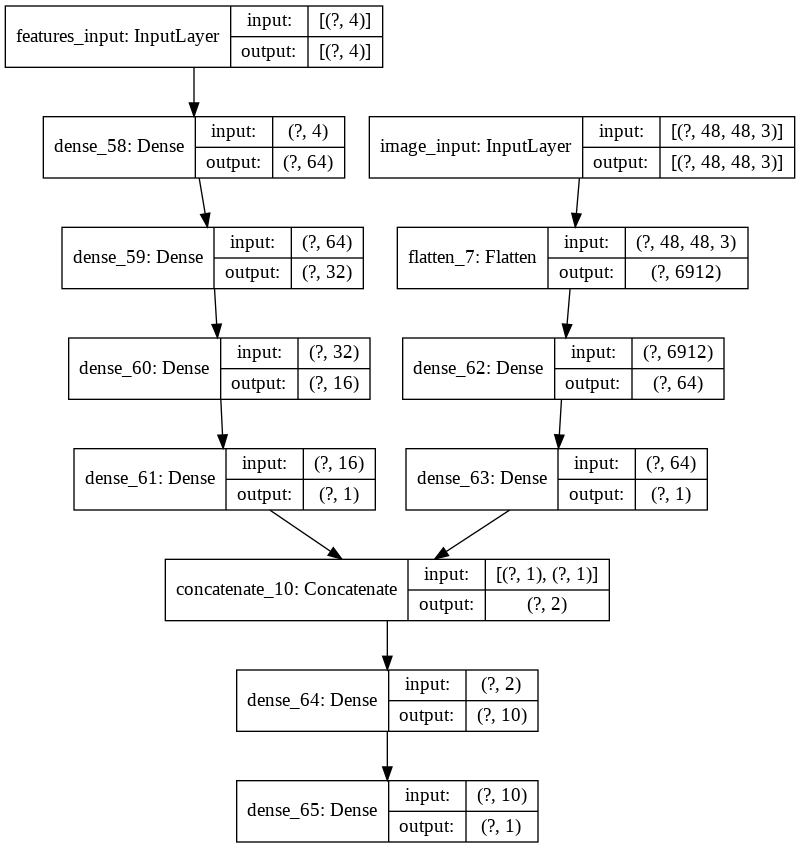

In [102]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [106]:
opt=tf.keras.optimizers.RMSprop(lr=1e-3)
model.compile(optimizer=opt,loss='mean_absolute_percentage_error')

In [108]:
model.fit(x=[train_features,train_images],y=train_prices,epochs=1000)

Epoch 1/1000
10/10 [==============================] - 0s 7ms/step - loss: 76.4457
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 67.5617
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 82.1116
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 406.3766
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - loss: 83.6569
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 70.1381
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 159.8200
Epoch 8/1000
10/10 [==============================] - 0s 8ms/step - loss: 119.2662
Epoch 9/1000
10/10 [==============================] - 0s 7ms/step - loss: 67.7254
Epoch 10/1000
10/10 [==============================] - 0s 6ms/step - loss: 69.9737
Epoch 11/1000
10/10 [==============================] - 0s 7ms/step - loss: 258.2466
Epoch 12/1000
10/10 [==============================] - 0s 7ms/step - loss: 98.6956
Epoch 13/

In [109]:
model.evaluate([test_features,test_images],test_prices)

3/3 [==============================] - 0s 3ms/step - loss: 56.8677


56.86774444580078

In [115]:
print(test_features[0:1].shape)
print(test_images[0:1].shape)
model.predict([test_features[0:1],test_images[0:1]])

(1, 4)
(1, 48, 48, 3)


array([[5.5340247]], dtype=float32)

In [116]:
print(test_prices[0:1])

[6.99]
